# Plot the calculated surface area ratio of MaSIF site for plant and animal proteins

## 26-04-2021 This script is for a short selection of proteins Hanna Lesme sent.
For these plant and milk proteins, I have also created .ply-files that Hanna was able to visualise in the MaSIF
PyMOL plugin.
A follow-up step includes using the MaSIF PPI plugin to predict which plant proteins and whey proteins could bind to the saliva proteins.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [25]:
# Load csv with surface area ratios
df = pd.read_csv('../Data/short_list_of_proteins.csv', sep = ',')
df = df.dropna()
df.rename(columns = {"Surface Ratio": "Surface area ratio"}, inplace=True)

In [26]:
# Add a column that allows you to compare plant to human to whey
df['Type'] = 'plant'

In [27]:
# Add a type column, all plant proteins together
df['Type'] = np.where(df['Organism'].astype(str).str.contains('whey'), 'Milk', 'Plant')
df['Type'] = np.where(df['Organism'].astype(str).str.contains('Human saliva'), 'Human', df['Type'])

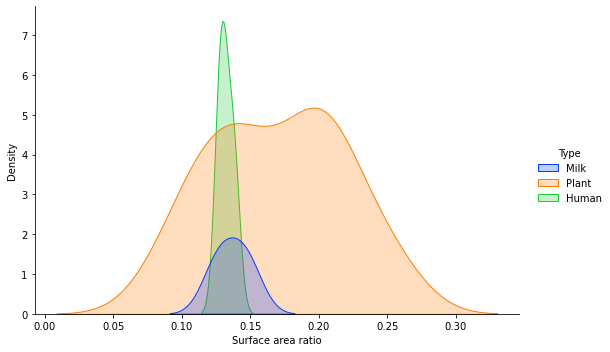

In [30]:
# Plot a histogram of surface area ratios.
sns.displot(data=df, 
            x='Surface area ratio', hue='Type', kind='kde', 
            fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)